In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 16

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

135

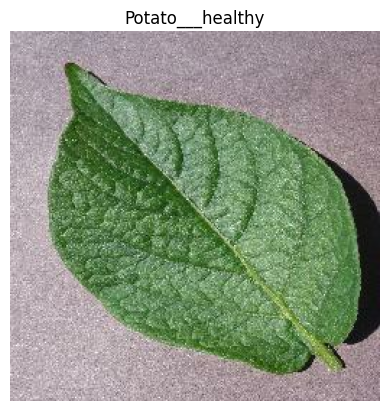

In [7]:
for image, label in dataset.take(1):
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(class_names[label[0]])
    plt.axis("off")

In [8]:
def getDatasetPartitionsTf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    if shuffle:
        ds = ds.shuffle(buffer_size=shuffle_size, seed=42)

    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = getDatasetPartitionsTf(dataset)

In [10]:
print(len(train_ds),
len(val_ds),
len(test_ds))

108 13 14


In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [13]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3) ,activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape = input_shape)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (16, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (16, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (16, 60, 60, 64)         

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds, verbose=1, batch_size=BATCH_SIZE)

Epoch 1/50
108/108 [==============================] - 15s 59ms/step - loss: 0.8830 - accuracy: 0.5186 - val_loss: 0.7670 - val_accuracy: 0.6442
Epoch 2/50
108/108 [==============================] - 3s 30ms/step - loss: 0.5786 - accuracy: 0.7314 - val_loss: 0.4174 - val_accuracy: 0.8317
Epoch 3/50
108/108 [==============================] - 3s 31ms/step - loss: 0.4119 - accuracy: 0.8122 - val_loss: 0.3310 - val_accuracy: 0.8750
Epoch 4/50
108/108 [==============================] - 3s 30ms/step - loss: 0.3345 - accuracy: 0.8576 - val_loss: 0.2712 - val_accuracy: 0.8510
Epoch 5/50
108/108 [==============================] - 3s 30ms/step - loss: 0.2348 - accuracy: 0.9052 - val_loss: 0.1407 - val_accuracy: 0.9471
Epoch 6/50
108/108 [==============================] - 3s 29ms/step - loss: 0.1948 - accuracy: 0.9209 - val_loss: 0.1734 - val_accuracy: 0.9183
Epoch 7/50
108/108 [==============================] - 3s 29ms/step - loss: 0.1309 - accuracy: 0.9506 - val_loss: 0.0704 - val_accuracy: 0.976

In [17]:
scores = model.evaluate(test_ds)
scores


14/14 [==============================] - 2s 15ms/step - loss: 0.0130 - accuracy: 0.9911


[0.013029227964580059, 0.9910714030265808]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

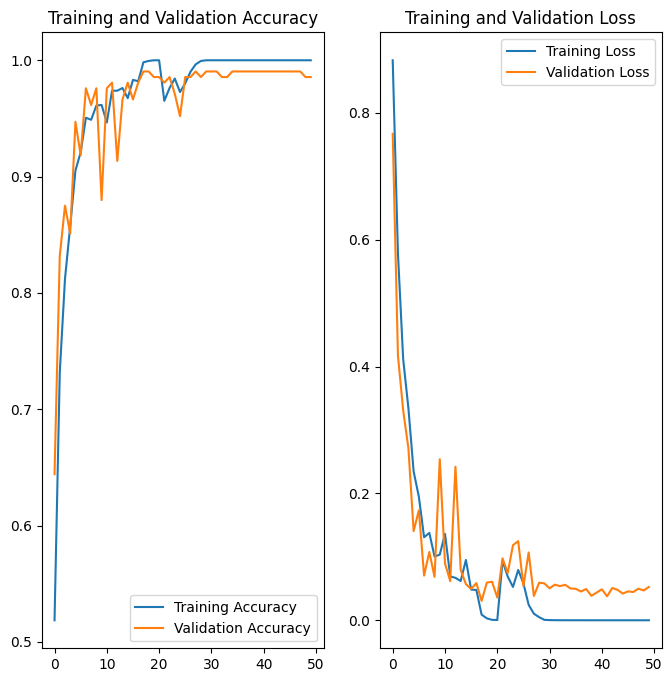

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 138ms/step
predicted label: Potato___Early_blight


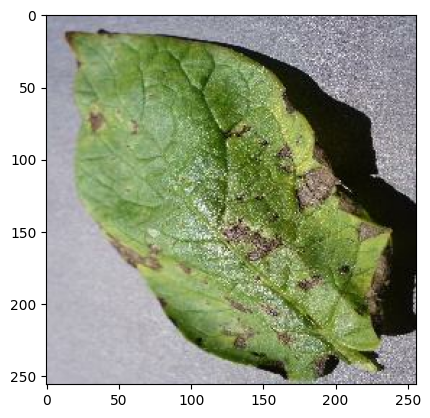

In [21]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 29ms/step


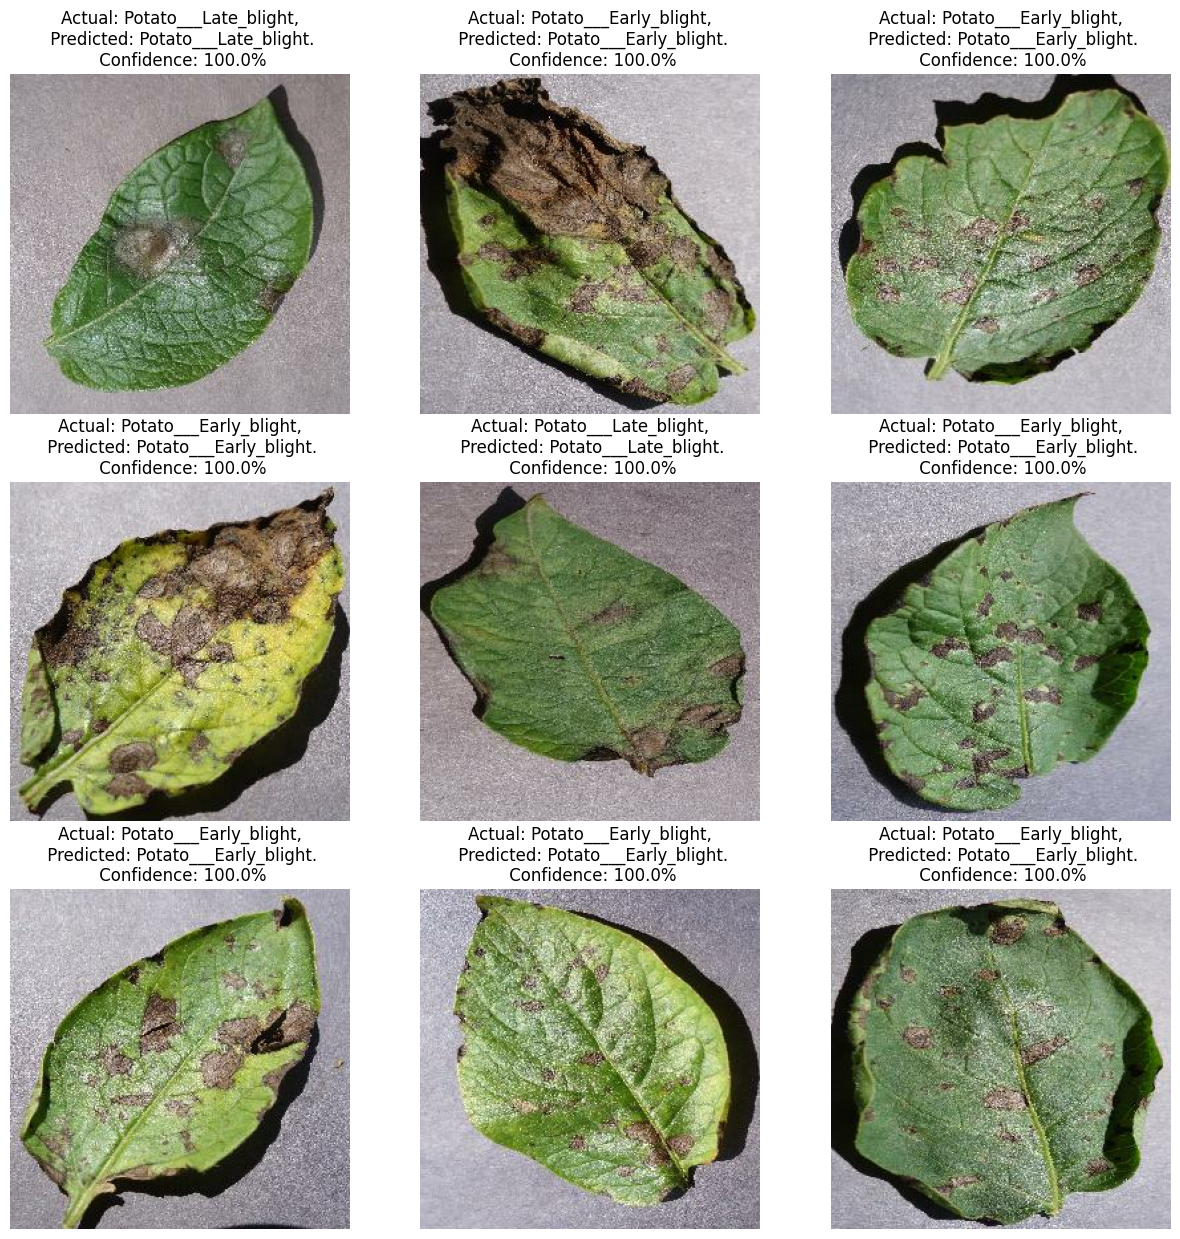

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [29]:
import os
model_version=max([int(i) for i in os.listdir("./models") + [0]])+1
model.save(f"./models/{model_version}")

In [31]:
model.save("./potatoes.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
!zip -r model.zip ./models

  adding: models/ (stored 0%)
  adding: models/1/ (stored 0%)
  adding: models/1/fingerprint.pb (stored 0%)
  adding: models/1/assets/ (stored 0%)
  adding: models/1/keras_metadata.pb (deflated 94%)
  adding: models/1/saved_model.pb (deflated 88%)
  adding: models/1/variables/ (stored 0%)
  adding: models/1/variables/variables.index (deflated 68%)
  adding: models/1/variables/variables.data-00000-of-00001 (deflated 13%)
